### Limpieza del dataset Police_Arrests_20240702
En este notebook "01_limpeza" se ejecutan codigos para limpiar en función de los hallazgos del notebook anterior "00_exploracion".  

**Se buscará**
- `Validar tipos de datos`
- `Limpiar valores en blanco`
- `Filtrar edades`
- `Agregar nuevas variables de interes en función de las existentes`

In [1]:
# Importo librerias de python
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Declaro el dataframe a usar
eccomerce_sales =r'C:\Users\Administrador\OneDrive - udd.cl\Python para la ciencia de datos\proyecto_final\Data\Police_Arrests_20240702.csv'
df = pd.read_csv(eccomerce_sales)

In [3]:
# Tipo de variables iniciales del dataframe y valores nulos
info = df.info()
print(info)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23510 entries, 0 to 23509
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID Reference Number     23510 non-null  int64  
 1   Subject's race          23510 non-null  object 
 2   Subject's gender        23510 non-null  object 
 3   Subject's age           23510 non-null  int64  
 4   Ethnicity               23510 non-null  object 
 5   District of occurrence  23408 non-null  float64
 6   Adjacent to School      23510 non-null  int64  
 7   Assigned Division       23381 non-null  object 
 8   Assigned Bureau         18851 non-null  object 
 9   Event Date/Time         23510 non-null  object 
dtypes: float64(1), int64(3), object(6)
memory usage: 1.8+ MB
None


In [13]:
# Modifico tipo de variable de "Event Date/Time"
df['Event Date/Time'] = pd.to_datetime(df['Event Date/Time'])
# Tipo de variables iniciales del dataframe y valores nulos
info = df.info()
print(info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23510 entries, 0 to 23509
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   ID Reference Number     23510 non-null  int64         
 1   Subject's race          23510 non-null  object        
 2   Subject's gender        23510 non-null  object        
 3   Subject's age           23510 non-null  int64         
 4   Ethnicity               23510 non-null  object        
 5   District of occurrence  23408 non-null  float64       
 6   Adjacent to School      23510 non-null  int64         
 7   Assigned Division       23381 non-null  object        
 8   Assigned Bureau         18851 non-null  object        
 9   Event Date/Time         23510 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(3), object(5)
memory usage: 1.8+ MB
None


El dataframe inicial tiene 23510 filas.
Se filtraron 4735 filas por concepto de nulos.
Se filtraron 2458 filas por concepto de edad.
El nuevo dataframe tiene 16317 filas.
<class 'pandas.core.frame.DataFrame'>
Index: 16317 entries, 0 to 23509
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   ID Reference Number     16317 non-null  int64         
 1   Subject's race          16317 non-null  object        
 2   Subject's gender        16317 non-null  object        
 3   Subject's age           16317 non-null  int64         
 4   Ethnicity               16317 non-null  object        
 5   District of occurrence  16317 non-null  float64       
 6   Adjacent to School      16317 non-null  int64         
 7   Assigned Division       16317 non-null  object        
 8   Assigned Bureau         16317 non-null  object        
 9   Event Date/Time         16317 non-null  datetime64[ns]
dtype

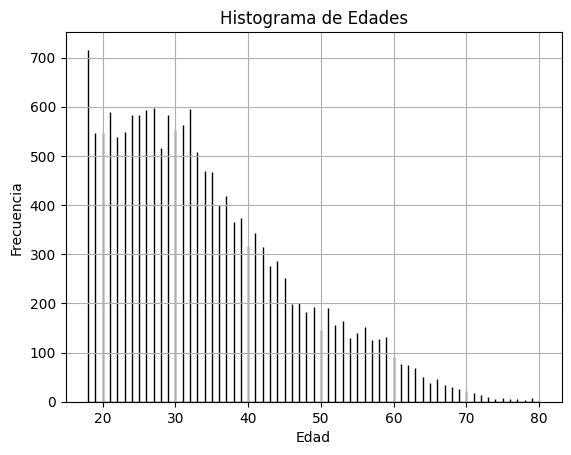

count    16317.000000
mean        34.083287
std         12.139814
min         18.000000
25%         25.000000
50%         32.000000
75%         41.000000
max         80.000000
Name: Subject's age, dtype: float64


In [14]:
# Elimino filas con valores en blanco
cantidad_inicial = len(df)
print(f"El dataframe inicial tiene {cantidad_inicial} filas.")
df_sin_nulos = df.dropna()
cantidad_df_sin_nulos = len(df_sin_nulos)
cantidad_nulos = cantidad_inicial - cantidad_df_sin_nulos
print(f"Se filtraron {cantidad_nulos} filas por concepto de nulos.")
# Filtro edades menor a 80 y mayor a 18
cantidad_inicial_2 = len(df_sin_nulos)
df_limpio = df_sin_nulos.loc[(df_sin_nulos["Subject's age"] <= 80) & (df_sin_nulos["Subject's age"] >= 18)]
cantidad_filtrada = len(df_limpio)
cantidad_df_limpio = cantidad_inicial_2 - cantidad_filtrada
print(f"Se filtraron {cantidad_df_limpio} filas por concepto de edad.")
print(f"El nuevo dataframe tiene {cantidad_filtrada} filas.")

#Verifico nuevo "n" del dataframe
info = df_limpio.info()
print(info)

# Creo histograma para verificar cambios en edad
plt.hist(df_limpio["Subject's age"], bins=df['ID Reference Number '].nunique(), edgecolor='black')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Histograma de Edades')
plt.grid(True)
plt.show()

# Verifico nuevos estadísticos de edad
age_stats = df_limpio["Subject's age"].describe()
print(age_stats)



**Limpieza inicial realizada**  
Se eliminaron valores en blanco, se filtro la variable correspondiente a la edad del sujeto por valores atipicos,por lo cual, se verificaron nuevos estadisticos de la variable filtrada "Subject's age"


**Filtrado de datos:**  
Se detalla el balance de datos filtrados:

| Cantidad de datos      | N             |
|------------------------|---------------|
| Dataframe Inicial      | 23.510        |
| Filtrados              | 7.193         |
| Dataframe limpio       | 16.317        |

**Cambios en variable númerica "Subject's age":**  
| Estadística | DF Inicial| DF Limpio   |
|-------------|-----------|-------------|
| count       | 23510     | 16317       |
| mean        | 31.813143 | 34.083287   |
| std         | 12.946909 | 12.139814   |
| min         | 1         | 18          | 
| 25%         | 22        | 25          |
| 50%         | 30        | 32          |
| 75%         | 39        | 41          |
| max         | 99        | 80          |



**Finalizamos la limpieza del df**